In [67]:
# import necessary modules
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [68]:
#plots

sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})

In [73]:
# plot graphs 
# dmso vs ro


ro_path= ["XMovie/Expt2020_017_setIII_STLC_GM132_RO3306_mKate2-Astrin_Nuf2-GFP_GFP_timelapse_03_R3D_D3D",
         "XMovie/Expt2020_017_setIII_STLC_GM132_RO3306_mKate2-Astrin_Nuf2-GFP_GFP_timelapse_05_R3D_D3D",
         "XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_03_R3D_D3D",
         "XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_04_R3D_D3D"]
dmso_path=  ["XMovie/Expt2020_017_setIII_STLC_GM132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_timelapse_03_R3D_D3D",
             "XMovie/Expt2020_017_setIII_STLC_GM132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_timelapse_05_R3D_D3D",
             "XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_03_R3D_D3D",
             "XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_04_R3D_D3D"]


# read both csvs to a dataframe
cell_count=0
df_graph=pd.DataFrame(columns=['CDKi','DMSO'])#,'type'])
for i in range(4):
    df_ro_bg=pd.read_csv(os.path.join(ro_path[i],'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv'))
    df_dmso_bg=pd.read_csv(os.path.join(dmso_path[i],'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv'))
    df_temp=pd.DataFrame(data=(df_ro_bg['intensity_ratio'],df_dmso_bg['intensity_ratio'])).transpose()
    df_temp.columns=['CDKi','DMSO']
    #df_temp['type']=i
    df_graph=pd.concat([df_graph,df_temp],ignore_index=True)
    cell_count+=1
    



In [74]:
df_graph.head()

,CDKi,DMSO
0,1.714921,7.177384
1,3.452851,4.705690
2,4.540189,2.930894
3,3.350728,6.211006
4,2.179880,3.428394


In [75]:
# count the number of KTs in CDKi and DMSO
cdki = df_graph['CDKi'].notnull().sum()
dmso = df_graph['DMSO'].notnull().sum()
cdki

2749

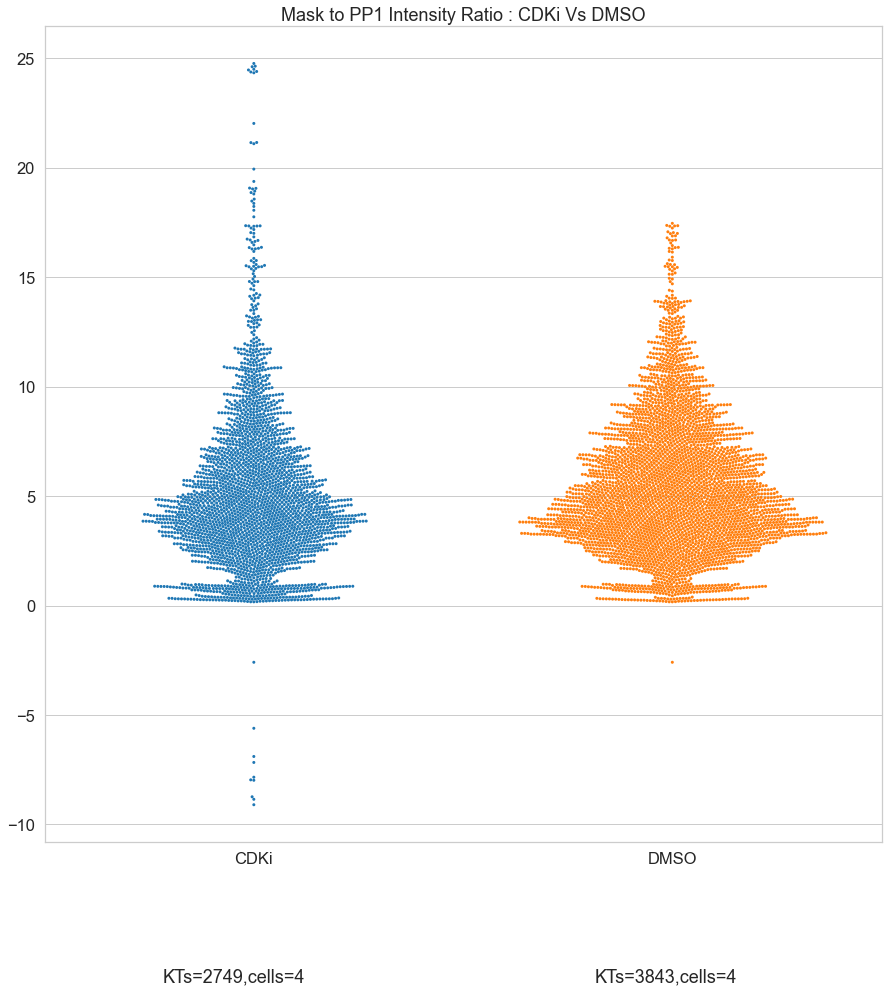

In [76]:
title="Mask to PP1 Intensity Ratio : CDKi Vs DMSO"
plt.figure(figsize=(15,15))
#
sns_plot = sns.swarmplot(s=3,data=df_graph).set_title(title)
plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(cdki,cell_count), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(dmso,cell_count), horizontalalignment='center',verticalalignment='center')

graph_path=os.path.join("XMovie","graphs" ,title)
sns_plot.figure.savefig(graph_path, bbox_inches="tight",dpi=300)
plt.show()

In [77]:
# pp1 to mask
#generate a dataframe with inverse
df_graph_inverse=pd.DataFrame()
df_graph_inverse['CDKi']=df_graph['CDKi'].apply(lambda x: 1/x)
df_graph_inverse['DMSO']=df_graph['DMSO'].apply(lambda x: 1/x)


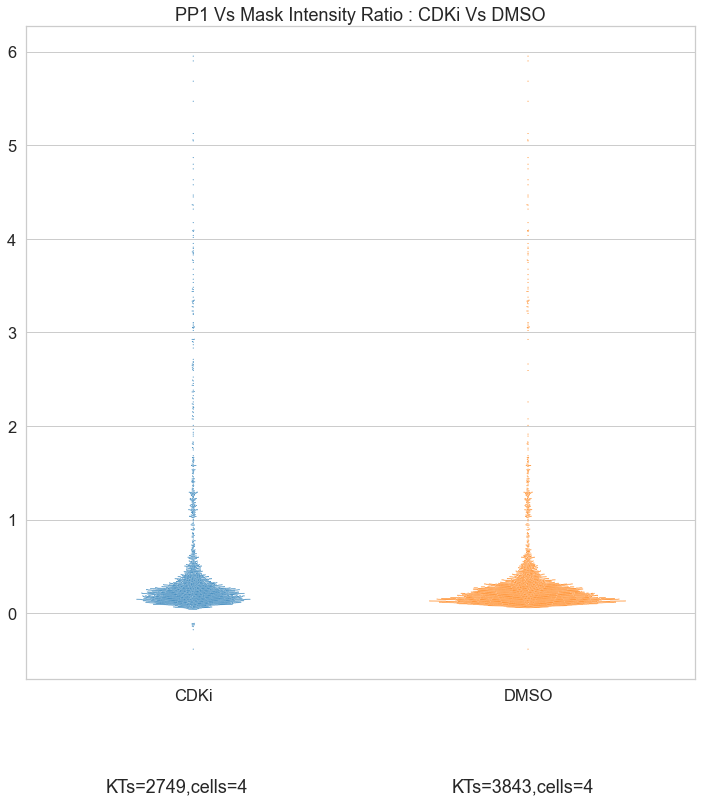

In [78]:
title="PP1 Vs Mask Intensity Ratio : CDKi Vs DMSO"
plt.figure(figsize=(12,12))

sns_plot = sns.swarmplot(s=1,data=df_graph_inverse).set_title(title) # change the value for s if all points are not placed in the graph
plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(cdki,cell_count), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(dmso,cell_count), horizontalalignment='center',verticalalignment='center')

graph_path=os.path.join("XMovie","graphs" ,title)
sns_plot.figure.savefig(graph_path, bbox_inches="tight",dpi=300)
plt.show()

In [79]:
# plot graphs 
# dmso vs ro


ro_path= ["XMovie/Expt2020_017_setIII_STLC_GM132_RO3306_mKate2-Astrin_Nuf2-GFP_GFP_timelapse_03_R3D_D3D",
         "XMovie/Expt2020_017_setIII_STLC_GM132_RO3306_mKate2-Astrin_Nuf2-GFP_GFP_timelapse_05_R3D_D3D",
         "XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_03_R3D_D3D",
         "XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_04_R3D_D3D"]
dmso_path=  ["XMovie/Expt2020_017_setIII_STLC_GM132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_timelapse_03_R3D_D3D",
             "XMovie/Expt2020_017_setIII_STLC_GM132_DMSO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_timelapse_05_R3D_D3D",
             "XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_03_R3D_D3D",
             "XMovie/Expt2020_017_setV_STLC_MG132_RO_mKate2-Astrin_Nuf2-GFP_GFP_mCherry_04_R3D_D3D"]


# read both csvs to a dataframe
cell_count=0
df_graph2=pd.DataFrame()#(columns=['ratio','condition','cell'])#,'type'])
for i in range(4):
    df_ro_bg=pd.read_csv(os.path.join(ro_path[i],'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv'))
    df_dmso_bg=pd.read_csv(os.path.join(dmso_path[i],'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv'))
    
    df_temp_cdki=pd.DataFrame(data=(df_ro_bg['intensity_ratio']))
    df_temp_cdki['condition']='cdki'
    df_temp_cdki['cell']= 'cell_%d'%i
    df_temp_dmso=pd.DataFrame(data=(df_dmso_bg['intensity_ratio']))
    df_temp_dmso['condition']='dmso'
    df_temp_dmso['cell']= 'cell_%d'%i
   
   
    
    df_graph2=pd.concat([df_graph2,df_temp_cdki,df_temp_dmso],ignore_index=True)

    cell_count+=1

In [80]:
df_graph2.head()

,intensity_ratio,condition,cell
0,1.714921,cdki,cell_0
1,3.452851,cdki,cell_0
2,4.540189,cdki,cell_0
3,3.350728,cdki,cell_0
4,2.179880,cdki,cell_0


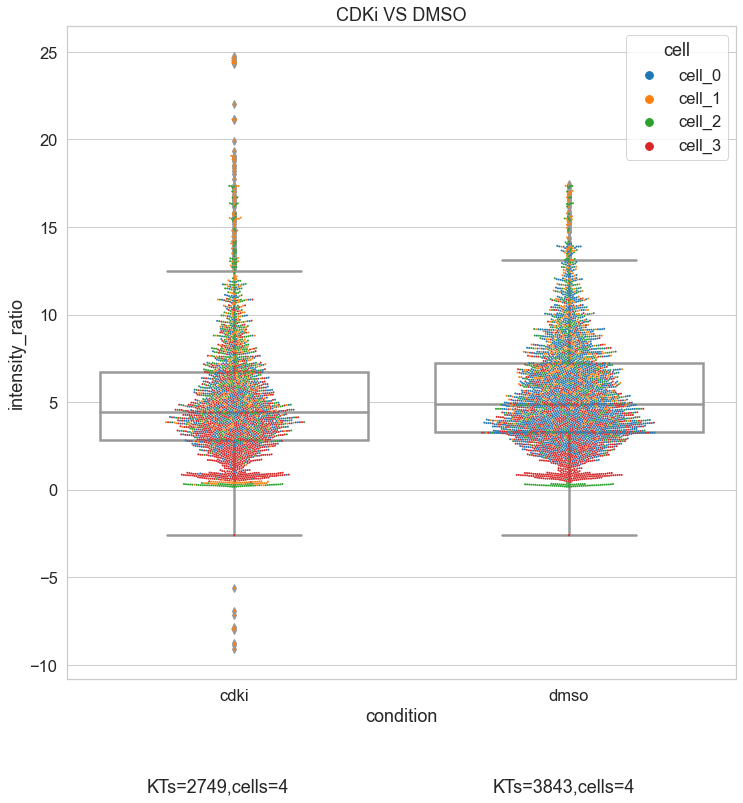

In [81]:
title="CDKi VS DMSO"
plt.figure(figsize=(12,12))
sns_plot=sns.boxplot(x='condition',y='intensity_ratio',color='white',data=df_graph2).set_title(title)
sns_plot = sns.swarmplot(s=2,x='condition',y='intensity_ratio',hue='cell',data=df_graph2) # change the value for s if all points are not placed in the graph
plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(cdki,4), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(dmso,4), horizontalalignment='center',verticalalignment='center')

graph_path=os.path.join("XMovie","graphs" ,title)
sns_plot.figure.savefig(graph_path, bbox_inches="tight",dpi=300)
plt.show()